In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""
Data description

• tourney_id - tournament_id

• tourney_name - tournament_name

• surface - surface in which the match is played

• draw_size - the size of the draw

• tourney_level - tournament level

'G' = Grand Slams

'M' = Masters 1000s

'A' = other tour-level events

'C' = Challengers

'S' = Satellites/ITFs

'F' = Tour finals and other season-ending events

'D' = Davis Cup

• tourney_date - starting date of the tournament

• match num - match number in a certain tournament

• id - player id

• seed - the seed of the player in that tournament

• entry - How did the player enter the tournaments?

WC - Wildcard

Q - Qualifier

LL - Lucky loser

PR - Protected ranking

SE - Special Exempt

ALT - Alternate player

• name - player name

• hand - hand of the player, right or left

• ht - the height of the player

• IOC - the country of origin

• age - age of the player

• score - final score in the match

• best_of - the maximum number of sets played

• round - the round in the tournament a match belongs to

• minutes - duration of the match in minutes

• ace - number of aces in the match
• df - double faults

• svpt - serve percent

• 1stin - first serve in percent

• 1stWon - first serve winning percent

• 2ndWon - second serve winning percent

• SvGms - number of games played on serve (So, the maximum difference between w_SvGms and l_SvGms will be 1)

• bpSaved - breakpoints saved

• bpFaced - breakpoints faced
"""

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', None)

 ### Abstract
 ##### La ciencia de datos juega un papel preponderante y en crecimiento en cuanto al análisis y predicciones de los resultados de los eventos deportivos. Estos se usa principalmente en el fútbol europeo donde casi todos los equipos y selecciones del continente, tienen departamentos de datos dedicados a identificar jugadores, estudiar lesiones y el reclutamiento de nuevos talentos. 
 
 ##### También, se ve mucha aplicación en el básquet y béisbol en EE.UU. por lo mismos motivos. En el mundo de tenis, los datos están presentes como algo descriptivo del juego y que, hace años, está presente en las transmiciones de TV como en las páginas web del circuito profesional. Actualmente, la data de los partidos se usa mucho para las casas de apuestas para determinar las probabilidades del ganador del partido. No se usa mucho para el desarrollo del club o equipo como se usa en el fútbol, todavía es algo "verde". 
 
 ##### En nuestro caso, busco hacer una análisis completo de cada perfil de jugador y entender cuáles son los mejores match-ups y que probabilidades tienen de ganar. Lo que se muestra a continuación, es algo experimental y no es definitivo.
 
 ##### Esto va dirijido a aquellas personas que jueguen, gusten y quieran hacer estudios sobre los mejores jugadores del tenis. Se busca usarlos de manera profesional como una herramienta de analisis para planear posibles enfrentamientos.

In [5]:
df = pd.read_csv('atp_matches_2004_2022_w_l.csv')

In [6]:
df.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
32324,168882,2015-560,US Open,Hard,128,G,20150831,22,104719,0,0,Marcel Granollers,R,190,ESP,29,105041,0,0,Lukas Lacko,R,185,SVK,27,6-2 6-3 6-1,5,R128,0,6,4,79,49,39,16,12,3,3,2,3,72,45,26,12,12,3,9,77,665,116,477
41731,178469,2019-580,Australian Open,Hard,128,G,20190114,182,105138,22,0,Roberto Bautista Agut,R,183,ESP,30,105357,0,0,John Millman,R,183,AUS,29,6-3 6-1 3-6 6-7(6) 6-4,5,R64,228,10,2,148,105,74,24,24,6,9,12,4,169,110,71,29,23,10,17,24,1605,37,1108
46891,183863,2021-1536,Madrid Masters,Clay,64,M,20210503,250,133430,11,0,Denis Shapovalov,L,185,CAN,22,105583,0,0,Dusan Lajovic,R,180,SRB,30,6-1 6-3,3,R64,62,7,2,45,21,19,15,8,3,3,1,1,48,28,14,10,8,5,9,14,2820,38,1595
2178,134620,2004-533,Costa Do Sauipe,Clay,32,A,20040223,17,102494,0,0,Tomas Behrend,R,193,GER,29,103105,0,0,Ruben Ramirez Hidalgo,R,183,ESP,26,6-2 6-2,3,R16,82,2,4,53,27,22,16,8,3,3,0,1,53,27,14,10,8,6,10,103,379,80,465
8769,142321,2007-1720,Bangkok,Hard,32,A,20070924,23,104098,6,0,Dmitry Tursunov,R,185,RUS,24,103566,0,0,Michael Llodra,L,190,FRA,27,6-4 6-4,3,R16,62,4,1,51,34,30,11,10,0,0,5,2,56,39,29,10,10,0,2,29,950,60,601
12275,146219,2008-375,Lyon,Carpet,32,A,20081020,30,103898,0,0,Julien Benneteau,R,185,FRA,26,104542,3,0,Jo-Wilfried Tsonga,R,188,FRA,23,7-6(4) 7-5,3,SF,105,7,3,76,55,41,13,12,3,4,14,1,80,46,34,18,12,4,6,56,704,14,1485
18331,153152,2010-520,Roland Garros,Clay,128,G,20100524,101,104918,4,0,Andy Murray,R,190,GBR,23,104571,25,0,Marcos Baghdatis,R,183,CYP,24,6-2 6-3 0-6 6-2,5,R32,153,4,6,100,62,43,13,15,4,9,5,6,116,49,29,30,16,10,18,4,5565,30,1465
28100,164210,2014-499,Delray Beach,Hard,32,A,20140217,3,105173,0,0,Adrian Mannarino,L,183,FRA,25,106058,0,WC,Jack Sock,R,185,USA,21,6-4 6-2,3,R32,73,1,6,68,47,33,9,9,7,8,7,4,57,33,22,8,9,5,9,70,714,82,652
47254,184228,2021-560,Us Open,Hard,128,G,20210830,138,126523,0,LL,Bernabe Zapata Miralles,R,185,ESP,24,103852,0,0,Feliciano Lopez,L,188,ESP,39,5-7 7-6(6) 4-6 6-3 6-3,5,R128,195,15,3,143,103,77,30,27,3,5,27,14,155,91,75,32,26,4,7,116,702,97,813
9549,143104,2007-375,Lyon,Carpet,32,A,20071022,28,102967,0,0,Marc Gicquel,R,188,FRA,30,103701,0,0,Diego Hartfield,R,185,ARG,26,7-5 6-3,3,QF,77,12,1,57,39,33,12,11,0,0,5,2,63,29,22,17,10,4,6,79,500,95,441


## Análisis.

#### Para este trabajo preeliminar, eligo un tenista conocido por casi todos y además, tiene partidos que data desde el año 2004 justo el año donde corto el dataframe original: Rafael Nadal. De él, me quedo con los partidos ganados para identificar patrones de su juego.

#### Se usará scatter plots para ver la concetración de los primeros servicios. Luego se usará barra para ver en que superficies tienen mayor margen de victorias. Por último, histogramas con kde para ver la concentación de aces, doble faltas y break points. Todos estos análisis se hacen en compraración con sus rivales en general. Más adelante, se hará en particular.

In [7]:
df_nadal_1 = df[df['winner_name'] == 'Rafael Nadal']

In [8]:
df_nadal_1.shape

(1028, 50)

In [9]:
df_nadal_1.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
38414,175104,2017-5014,Shanghai Masters,Hard,64,M,20171009,293,104745,1,0,Rafael Nadal,L,185,ESP,31,104926,0,0,Fabio Fognini,R,178,ITA,30,6-3 6-1,3,R16,62,7,0,46,36,28,6,8,2,2,3,3,43,24,16,7,8,1,5,1,9875,28,1650
3167,136009,2005-316,Bastad,Clay,32,A,20050704,1,104745,1,0,Rafael Nadal,L,185,ESP,19,104338,0,0,Juan Monaco,R,185,ARG,21,6-1 6-1,3,R32,55,3,2,38,28,23,5,7,0,0,0,1,39,25,11,3,7,1,6,3,3635,66,587
11548,145484,2008-1536,Madrid Masters,Hard,48,M,20081012,41,104745,1,0,Rafael Nadal,L,185,ESP,22,103852,0,0,Feliciano Lopez,L,188,ESP,27,6-4 6-4,3,QF,91,0,0,61,43,32,13,10,2,2,4,1,54,29,21,14,10,2,4,1,7000,40,865
13672,147624,2008-540,Wimbledon,Grass,128,G,20080623,124,104745,2,0,Rafael Nadal,L,185,ESP,22,104918,11,0,Andy Murray,R,190,GBR,21,6-3 6-2 6-4,5,QF,115,4,1,66,41,36,20,14,0,0,5,2,91,46,31,18,13,6,10,2,5755,11,1555
33226,169864,2016-0506,Buenos Aires,Clay,32,A,20160208,297,104745,1,0,Rafael Nadal,L,185,ESP,29,103893,0,0,Paolo Lorenzi,R,183,ITA,34,7-6(3) 6-2,3,QF,111,2,1,65,45,33,12,10,3,4,5,1,63,33,25,10,10,2,5,5,4880,52,831
9856,143413,2007-410,Monte Carlo Masters,Clay,56,M,20070415,54,104745,2,0,Rafael Nadal,L,185,ESP,20,104607,10,0,Tomas Berdych,R,196,CZE,21,6-0 7-5,3,SF,83,2,1,50,24,17,20,9,0,0,1,3,52,30,16,10,9,0,4,2,4875,14,1715
13675,147627,2008-540,Wimbledon,Grass,128,G,20080623,127,104745,2,0,Rafael Nadal,L,185,ESP,22,103819,1,0,Roger Federer,R,185,SUI,26,6-4 6-4 6-7(5) 6-7(8) 9-7,5,F,288,6,3,218,160,111,34,30,12,13,25,2,195,127,92,39,30,9,13,2,5755,1,6900
16256,150565,2009-520,Roland Garros,Clay,128,G,20090525,97,104745,1,0,Rafael Nadal,L,185,ESP,22,103720,0,0,Lleyton Hewitt,R,180,AUS,28,6-1 6-3 6-1,5,R32,111,7,0,66,50,38,10,12,2,3,2,2,75,46,26,9,11,6,13,1,14960,48,1190
28553,164769,2014-410,Monte Carlo Masters,Clay,56,M,20140413,41,104745,1,0,Rafael Nadal,L,185,ESP,27,104312,0,0,Andreas Seppi,R,190,ITA,30,6-1 6-3,3,R16,74,2,2,45,29,24,7,8,5,6,1,0,49,27,15,7,8,0,5,1,13730,35,1150
11260,144826,2007-580,Australian Open,Hard,128,G,20070115,96,104745,2,0,Rafael Nadal,L,185,ESP,20,104259,0,0,Philipp Kohlschreiber,R,178,GER,23,7-5 6-3 4-6 6-2,5,R64,210,4,6,125,81,57,22,20,9,13,8,3,128,68,41,30,19,14,21,2,4525,61,631


In [10]:
df_nadal_2 = df[df['loser_name'] == 'Rafael Nadal']

In [11]:
df_nadal_2.shape

(202, 50)

In [12]:
df_nadal_2.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
34139,170787,2016-M009,Rome Masters,Clay,64,M,20160509,297,104925,1,0,Novak Djokovic,R,188,SRB,28,104745,5,0,Rafael Nadal,L,185,ESP,29,7-5 7-6(4),3,QF,144,3,2,79,56,36,15,12,1,3,2,1,92,76,45,11,12,6,9,1,16550,5,5675
32651,169280,2015-5014,Shanghai Masters,Hard,56,M,20151011,54,104542,16,0,Jo-Wilfried Tsonga,R,188,FRA,30,104745,8,0,Rafael Nadal,L,185,ESP,29,6-4 0-6 7-5,3,SF,0,11,3,90,59,45,12,14,8,11,1,1,89,68,48,10,14,8,10,15,1990,7,4060
38900,175605,2018-580,Australian Open,Hard,128,G,20180115,501,105227,6,0,Marin Cilic,R,198,CRO,29,104745,1,0,Rafael Nadal,L,185,ESP,31,3-6 6-3 6-7(5) 6-2 2-0 RET,5,QF,227,20,8,138,93,72,17,20,8,10,3,2,164,123,83,13,20,14,19,6,3805,1,10600
28560,164777,2014-410,Monte Carlo Masters,Clay,56,M,20140413,49,103970,6,0,David Ferrer,R,175,ESP,32,104745,1,0,Rafael Nadal,L,185,ESP,27,7-6(1) 6-4,3,QF,134,1,1,90,55,33,20,11,7,10,1,2,80,49,29,14,11,6,10,6,4640,1,13730
8488,141696,2006-605,Masters Cup,Hard,8,F,20061113,4,103819,0,0,Roger Federer,R,185,SUI,25,104745,0,0,Rafael Nadal,L,185,ESP,20,6-4 7-5,3,SF,113,7,4,60,37,32,10,11,1,2,0,2,80,55,33,14,11,8,11,1,7620,2,4270
22358,157681,2011-605,Tour Finals,Hard,16,F,20111120,3,104542,0,0,Jo-Wilfried Tsonga,R,188,FRA,26,104745,0,0,Rafael Nadal,L,185,ESP,25,7-6(2) 4-6 6-3,3,RR,162,11,6,93,51,43,20,15,5,7,2,1,97,63,44,16,16,3,6,6,3535,2,9375
35108,171762,2016-M024,Cincinnati Masters,Hard,64,M,20160815,288,106432,0,0,Borna Coric,R,188,CRO,19,104745,3,0,Rafael Nadal,L,185,ESP,30,6-1 6-3,3,R16,72,8,1,44,30,25,7,8,2,3,1,5,49,33,21,2,8,3,8,49,935,5,4850
25956,161852,2013-410,Monte Carlo Masters,Clay,56,M,20130414,55,104925,1,0,Novak Djokovic,R,188,SRB,25,104745,3,0,Rafael Nadal,L,185,ESP,26,6-2 7-6(1),3,F,112,2,0,61,38,24,14,10,3,6,2,3,78,56,31,7,10,7,12,1,12500,5,6385
32837,169470,2015-352,Paris Masters,Hard,48,M,20151102,42,104527,4,0,Stan Wawrinka,R,183,SUI,30,104745,7,0,Rafael Nadal,L,185,ESP,29,7-6(8) 7-6(7),3,QF,0,11,1,90,54,44,18,12,6,8,2,2,92,63,42,18,12,3,5,4,6585,6,4630
7761,140965,2006-496,Marseille,Hard,32,A,20060213,29,103096,0,WC,Arnaud Clement,R,173,FRA,28,104745,1,0,Rafael Nadal,L,185,ESP,19,2-6 6-3 7-5,3,SF,115,8,3,86,54,40,18,15,1,3,5,1,93,58,37,22,14,7,9,65,576,2,4615


#### Hacemos una descripción de los datos brindados de sus trinufos. El énfasis va a ser los campos w_ y l_ ya que indican los números del ganador (w_ > Rafael Nadal) contra los del perdedor (l_ > Rivales). Esto nos da unas metricas basicas de los numeros absolutos de Nadal.

In [13]:
df_nadal_1.describe()

,Unnamed: 0,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,1028.000000,1028.000000,1.028000e+03,1028.000000,1028.0,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,159207.707198,77.140078,2.012219e+07,130.250000,104745.0,2.416342,185.0,25.533074,107262.857977,4.106031,185.946498,26.040856,3.624514,113.770428,3.254864,1.611868,71.447471,48.587549,35.942607,13.521401,11.867704,3.022374,4.325875,5.142023,2.716926,77.364786,47.418288,30.186770,12.784047,11.678988,4.996109,9.407588,4.926070,7296.360895,55.678016,1766.391051
std,15054.420294,39.135246,5.084395e+04,183.705685,0.0,2.931514,0.0,5.077000,14133.044166,7.122481,9.058828,3.878923,0.927279,48.576943,2.760344,1.540791,27.194316,19.654591,13.532017,5.553539,4.058243,2.963012,3.836969,5.137569,2.120661,28.314381,19.322461,14.324999,6.407765,4.032254,3.309716,4.122069,9.980525,3443.659432,67.477043,1975.196049
min,132447.000000,4.000000,2.004011e+07,1.000000,104745.0,0.000000,185.0,17.000000,100644.000000,0.000000,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,9.000000,5.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,585.000000,1.000000,23.000000
25%,146573.000000,48.000000,2.008043e+07,36.000000,104745.0,1.000000,185.0,21.000000,103888.000000,0.000000,183.000000,23.000000,3.000000,82.000000,1.000000,0.000000,52.000000,34.000000,26.000000,10.000000,9.000000,1.000000,2.000000,2.000000,1.000000,57.000000,33.000000,20.000000,8.000000,9.000000,3.000000,6.000000,1.000000,4875.000000,15.750000,664.750000
50%,157964.000000,64.000000,2.012012e+07,64.000000,104745.0,2.000000,185.0,25.000000,104593.000000,0.000000,185.000000,26.000000,3.000000,107.500000,3.000000,1.000000,66.000000,45.000000,34.000000,13.000000,11.000000,2.000000,3.000000,4.000000,2.000000,72.000000,45.000000,28.000000,12.000000,11.000000,4.000000,9.000000,2.000000,6525.000000,37.000000,1075.000000
75%,172493.000000,128.000000,2.017011e+07,195.000000,104745.0,2.000000,185.0,30.000000,105224.000000,6.000000,190.000000,29.000000,5.000000,139.000000,5.000000,2.000000,86.000000,59.000000,43.000000,17.000000,14.000000,4.000000,6.000000,7.000000,4.000000,93.000000,57.000000,37.000000,16.000000,14.000000,7.000000,12.000000,4.000000,9670.000000,73.000000,1893.750000
max,187941.000000,128.000000,2.022111e+07,1701.000000,104745.0,32.000000,185.0,36.000000,208014.000000,33.000000,211.000000,39.000000,5.000000,324.000000,18.000000,11.000000,218.000000,160.000000,111.000000,35.000000,30.000000,16.000000,22.000000,35.000000,13.000000,212.000000,148.000000,104.000000,40.000000,30.000000,21.000000,29.000000,71.000000,15390.000000,694.000000,12670.000000


# Primeros saques.

In [14]:
df_nadal_1['w_1serve_per'] = ((df_nadal_1['w_1stIn']/df_nadal_1['w_svpt'])*100).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3140\1358797540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nadal_1['w_1serve_per'] = ((df_nadal_1['w_1stIn']/df_nadal_1['w_svpt'])*100).astype(int)


#### Una de las primeras cuestiones a revisar, es la efectividad del saque. Es necesario tener un porcentaje alto de primeros saques para ganar los partidos, ya que el primer saque, suele aplicarse mas fuerza, velocidad y angulo para hacer mas dano al rival.

#### El segundo saque suele usarse para asegurar que entre, para no ceder un punto gratis a su rival.

#### Debemos tener en cuenta si el porcentaje de puntos ganados con su saque es mayor al de los rivales, en aquellos partidos donde Nadal gano.


In [15]:
df_nadal_1['w_1servewon_per'] = ((df_nadal_1['w_1stWon']/df_nadal_1['w_1stIn'])*100).astype(int)
df_nadal_1['l_1servewon_per'] = ((df_nadal_1['l_1stWon']/df_nadal_1['l_1stIn'])*100).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3140\3321409956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nadal_1['w_1servewon_per'] = ((df_nadal_1['w_1stWon']/df_nadal_1['w_1stIn'])*100).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3140\3321409956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nadal_1['l_1servewon_per'] = ((df_nadal_1['l_1stWon']/df_nadal_1['l_1stIn'])*100).astype(int)


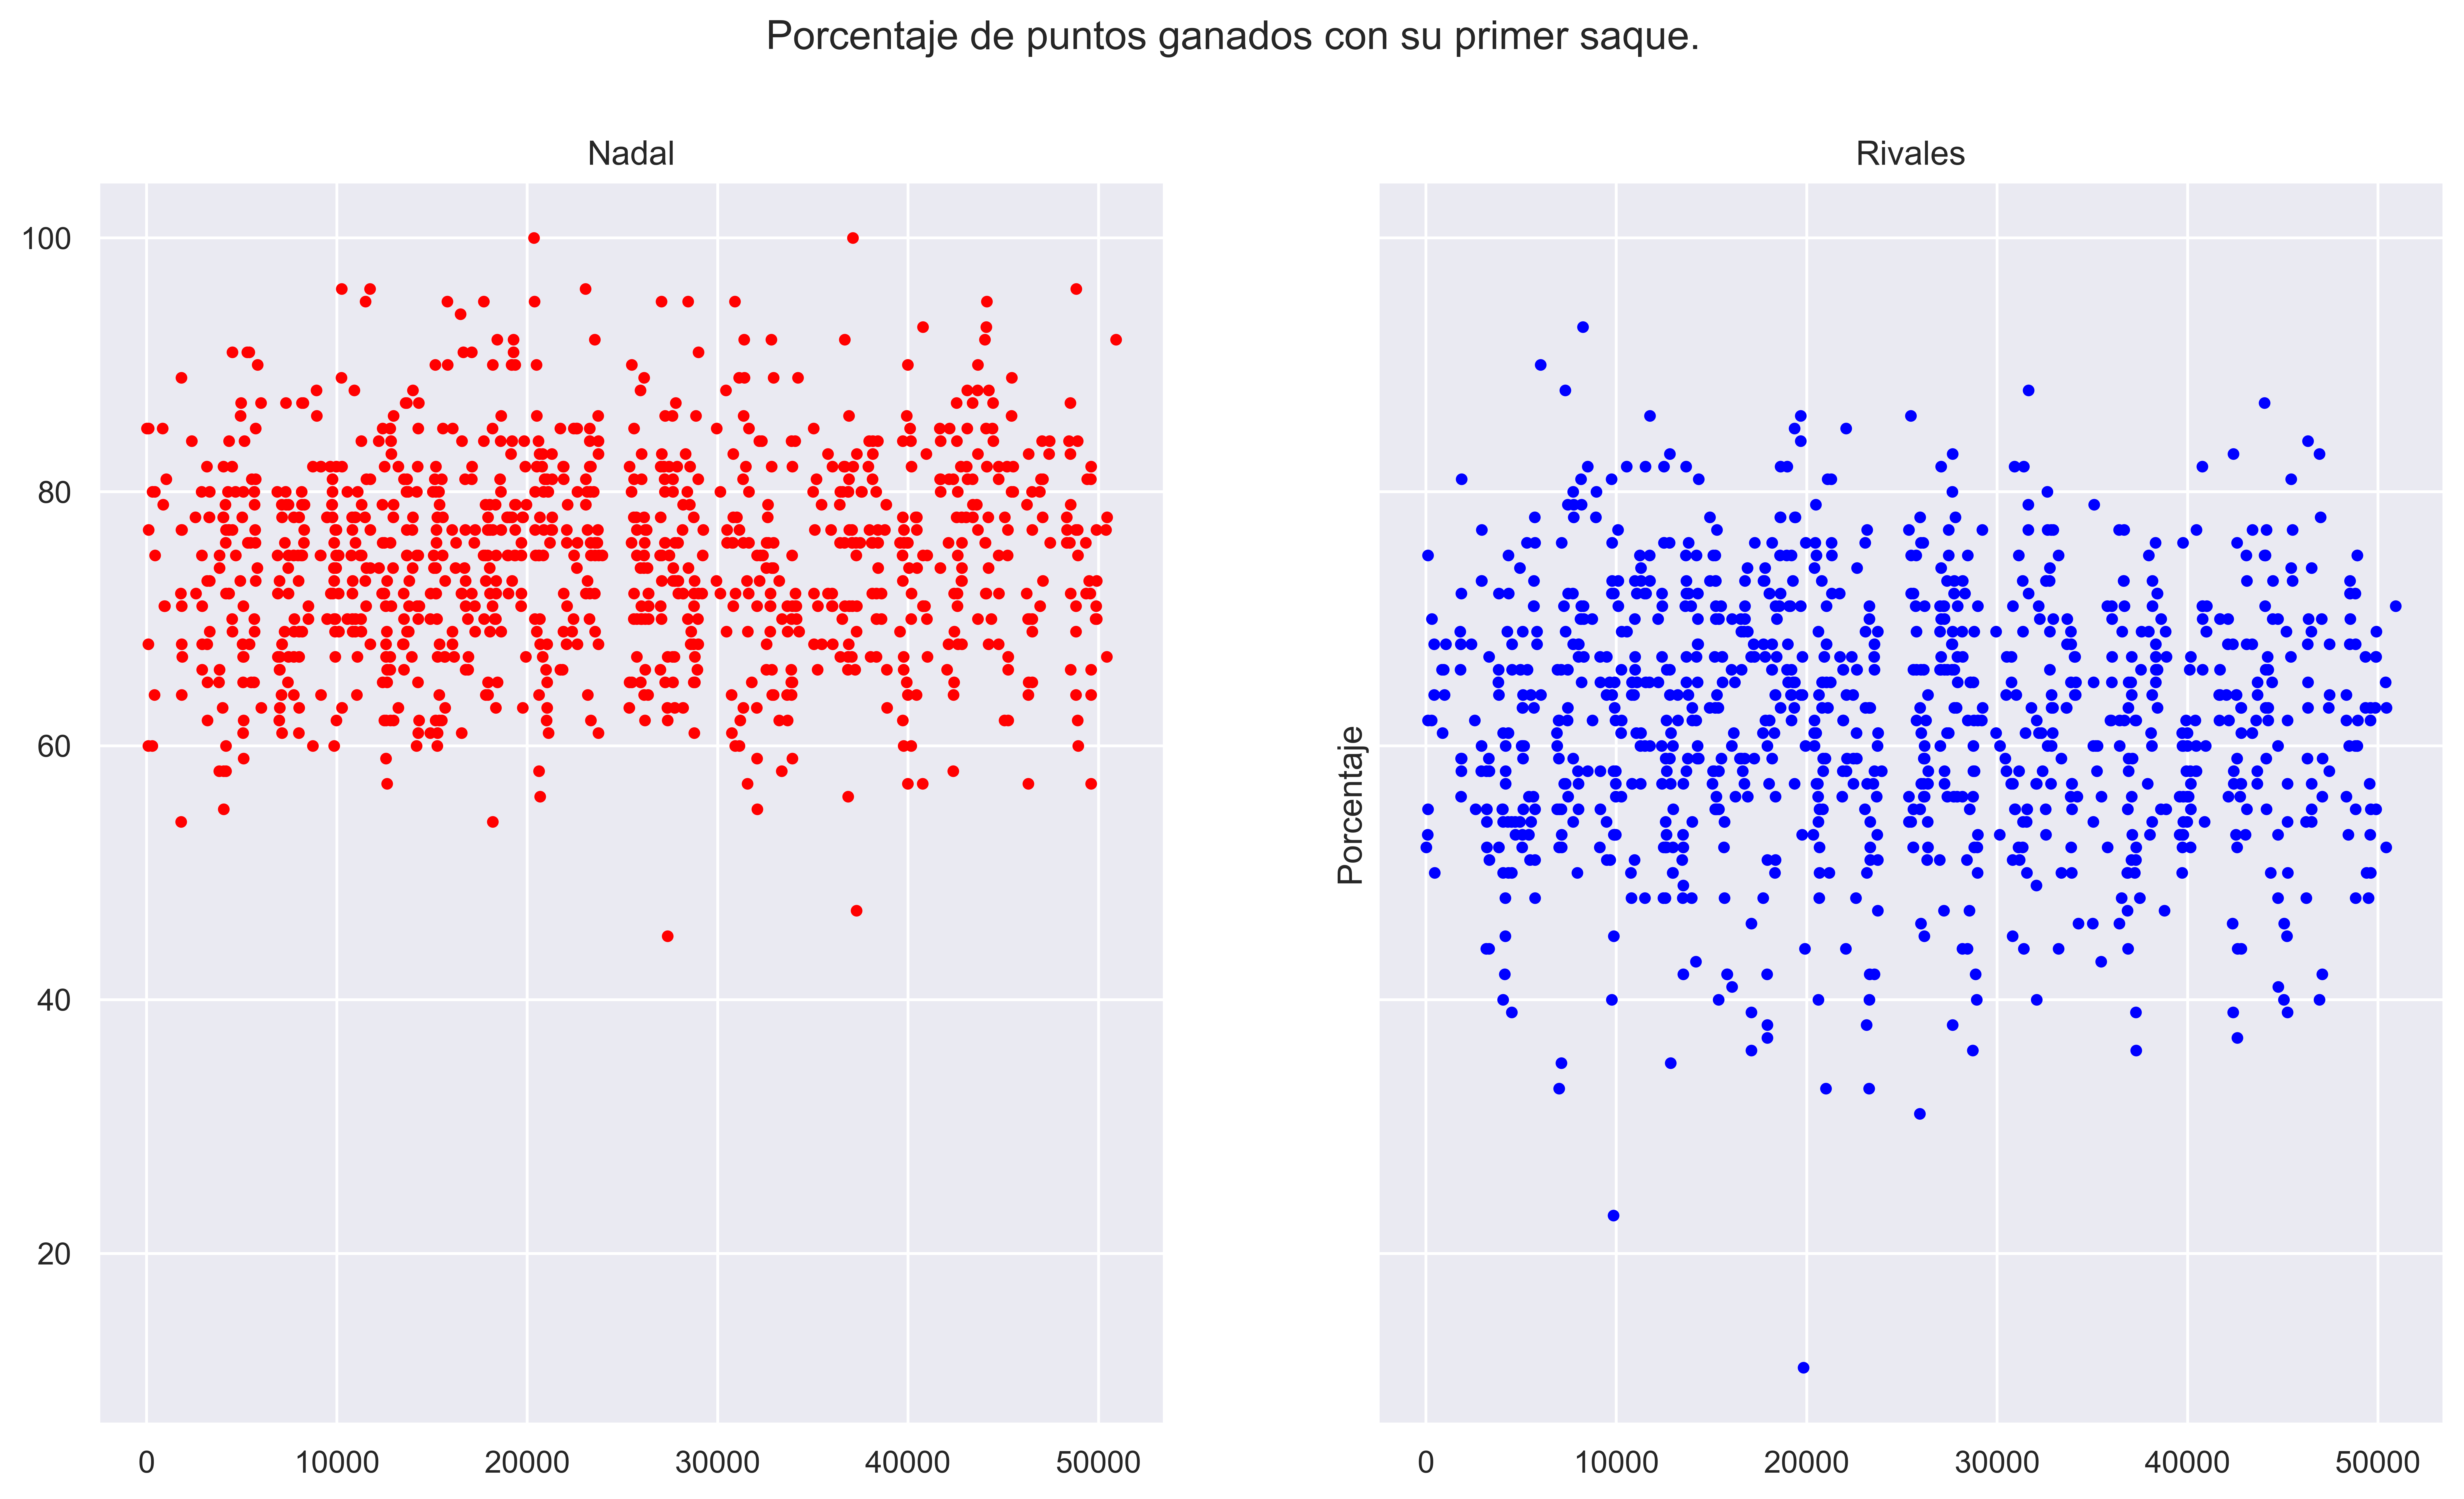

In [45]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, dpi=720, figsize=(15, 8))

y1 = df_nadal_1['w_1servewon_per']
x1 = df_nadal_1.index

y2 = df_nadal_1['l_1servewon_per']
x2 = df_nadal_1.index

ax[0].scatter(x1, y1, color='red', s=10)
ax[1].scatter(x2, y2, color='blue', s=10)

fig.suptitle('Porcentaje de puntos ganados con su primer saque.')

ax[0].set_title('Nadal')
ax[1].set_title('Rivales')

plt.ylabel('Porcentaje')
plt.show()


# Superficies. 

#### Los jugadores suelen tener afinidad en las superficies donde juegan. Hay jugadores donde se destacan mas en una superficie que otra. Es determinante en su estilo de juego y a la hora de determinar el ganador de un enfrentamiento.

#### Determinamos en que superficies, el jugador consigue el mayor porcentaje de victorias ha conseguido.

#### Se decarta la superfice carpeta/carpet ya que, desde el ano 2009, no se juega mas en dicha superficie.

surface
Clay     92
Grass    79
Hard     78
Name: count, dtype: int32


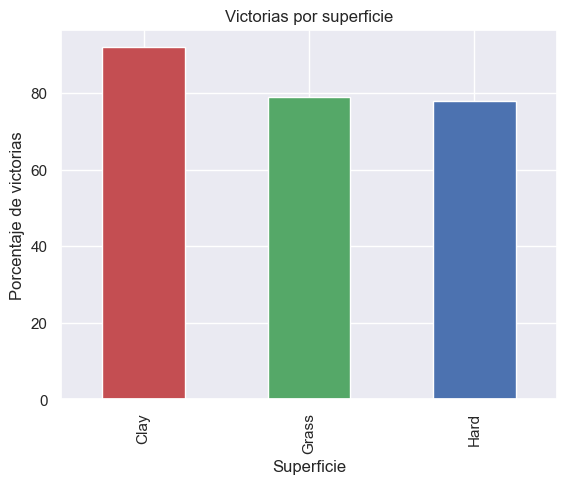

In [33]:
counts_vic = df_nadal_1['surface'].value_counts()
counts_der = df_nadal_2['surface'].value_counts()
dict_colors = {'Clay': 'r', 'Grass':'g', 'Hard':'b'}
suma_count = counts_vic + counts_der
por_victories_sup = (((counts_vic/suma_count)*100).astype(int)).sort_values(ascending=False)
por_victories_sup = por_victories_sup.drop('Carpet', axis=0)
print(por_victories_sup)
por_victories_sup.plot.bar(color = dict_colors.values())
plt.xlabel('Superficie')
plt.ylabel('Porcentaje de victorias')
plt.title('Victorias por superficie')
plt.xticks()
plt.show()

# Aces y doble faltas.

#### Otra variable a tener en cuenta es la cantidad de aces. En algunos jugadores, es algo determinante ya que pueden basan su juego en concretar la mayor cantidad de aces. 

#### Se mira cuál es la cantidad de aces que realiza durante sus victorias.

Text(0, 0.5, 'Frecuencia')

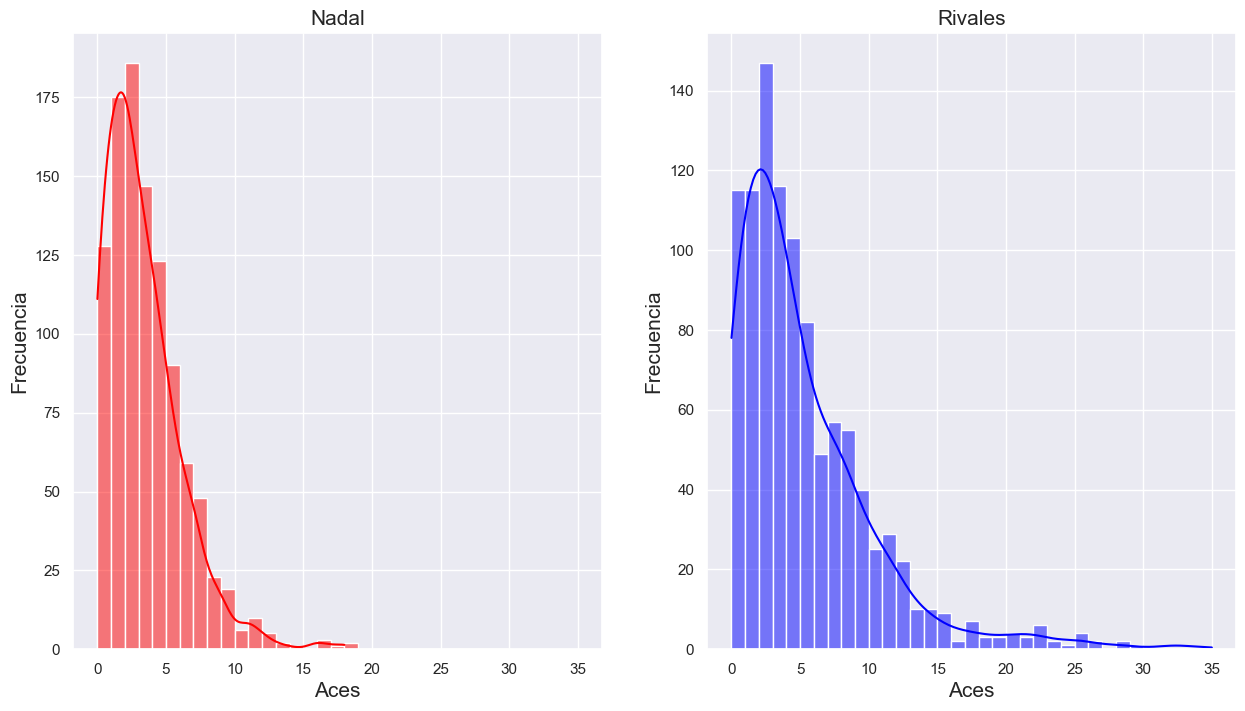

In [20]:
sns.set()
fig, axes = plt.subplots(1, 2, sharex=True,figsize=(15, 8))
sns.histplot(data=df_nadal_1, x="w_ace", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[0])
sns.histplot(data=df_nadal_1, x="l_ace", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[1])
axes[0].set_title('Nadal', fontdict={'size': 15})
axes[1].set_title('Rivales', fontdict={'size': 15})
axes[0].set_xlabel('Aces', fontdict={'size': 15})
axes[1].set_xlabel('Aces', fontdict={'size': 15})
axes[0].set_ylabel('Frecuencia', fontdict={'size': 15})
axes[1].set_ylabel('Frecuencia', fontdict={'size': 15})

#### Conjunto a los aces, se toman en cuenta la cantidad de dobles faltas que realizan. Estos son puntos que el jugador cede a su rival cuando su saque falla dos veces seguidas. Cuanto más doble faltas haga un jugador, más puntos cede a sus rivales. 

#### Se mira cuál es la cantidad de aces que realiza durante sus victorias.

Text(0, 0.5, 'Frecuencia')

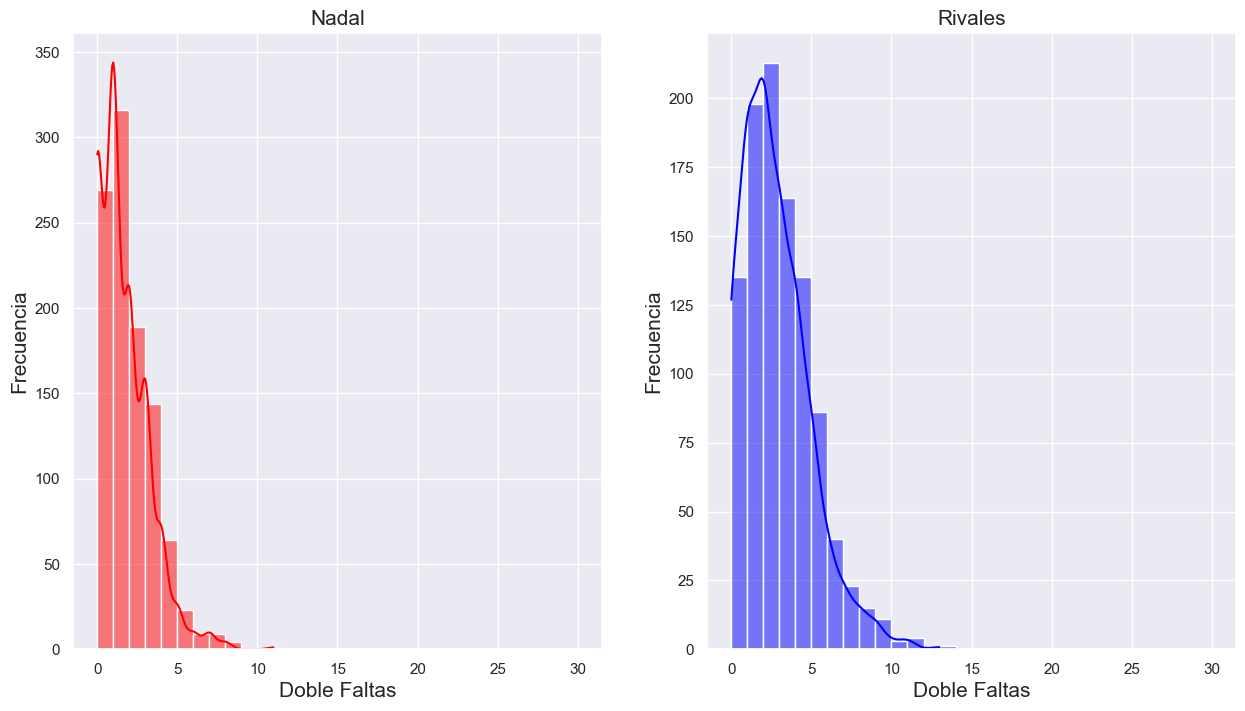

In [27]:
sns.set()
fig, axes = plt.subplots(1, 2, sharex=True,figsize=(15, 8))
sns.histplot(data=df_nadal_1, x="w_df", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[0])
sns.histplot(data=df_nadal_1, x="l_df", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[1])
axes[0].set_title('Nadal', fontdict={'size': 15})
axes[1].set_title('Rivales', fontdict={'size': 15})
axes[0].set_xlabel('Doble Faltas', fontdict={'size': 15})
axes[1].set_xlabel('Doble Faltas', fontdict={'size': 15})
axes[0].set_ylabel('Frecuencia', fontdict={'size': 15})
axes[1].set_ylabel('Frecuencia', fontdict={'size': 15})

# Break points. 

#### Break points son aquellos puntos que "rompen" el flujo normal del jugo, ganándose contra el saque del rival. Esto es un indicador de un jugador que juega muy bien cuando recibe el saque de rival y es capaz de ganarle games sin su saque. 

#### Para determinar la cantidad de break points hechos, se toman en cuenta los puntos que el rival enfrento y se resta los que salvó. La diferencia son los puntos que cedió a su oponente. 

In [29]:
df_nadal_1['break_points_made'] = (df_nadal_1['l_bpFaced']-df_nadal_1['l_bpSaved']).astype(int)
df_nadal_1['break_points_recieved'] = (df_nadal_1['w_bpFaced']-df_nadal_1['w_bpSaved']).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3140\4071662930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nadal_1['break_points_made'] = (df_nadal_1['l_bpFaced']-df_nadal_1['l_bpSaved']).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3140\4071662930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nadal_1['break_points_recieved'] = (df_nadal_1['w_bpFaced']-df_nadal_1['w_bpSaved']).astype(int)


In [28]:
df_nadal_1.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_1serve_per,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
8165,141369,2006-540,Wimbledon,Grass,128,G,20060626,120,104745,2,0,Rafael Nadal,L,185,ESP,20,103789,0,Q,Irakli Labadze,L,188,GEO,25,6-3 7-6(4) 6-3,5,R16,132,7,0,85,54,43,26,16,0,0,8,7,102,60,42,23,14,4,6,2,4545,166,249,63,79,70,2,0
10819,144382,2007-520,Roland Garros,Clay,128,G,20070528,126,104745,2,0,Rafael Nadal,L,185,ESP,20,104925,6,0,Novak Djokovic,R,188,SRB,20,7-5 6-4 6-2,5,SF,148,3,1,86,61,45,15,15,4,6,3,1,95,68,39,10,15,3,9,2,5225,6,2810,70,73,57,6,2
46504,183473,2021-0425,Barcelona,Clay,64,A,20210419,285,104745,1,0,Rafael Nadal,L,185,ESP,34,125802,0,Q,Ilya Ivashka,R,193,BLR,27,3-6 6-2 6-4,3,R32,139,1,2,81,50,40,16,14,1,3,6,1,80,52,36,13,13,3,6,3,9490,111,713,61,80,69,3,2
9151,142704,2007-321,Stuttgart,Clay,32,A,20070716,25,104745,1,0,Rafael Nadal,L,185,ESP,21,104338,8,0,Juan Monaco,R,185,ARG,23,6-1 6-3,3,QF,77,3,0,39,28,23,9,8,0,0,3,6,63,31,18,15,8,4,8,2,5225,29,945,71,82,58,4,0
49907,186911,2022-540,Wimbledon,Grass,128,G,20220627,223,104745,2,0,Rafael Nadal,L,185,ESP,36,126203,11,0,Taylor Fritz,R,193,USA,24,3-6 7-5 3-6 7-5 7-6(4),5,QF,261,5,7,164,107,75,27,28,6,14,19,3,172,109,76,30,27,7,14,4,6525,14,3045,65,70,69,7,8
45247,182100,2020-520,Roland Garros,Clay,128,G,20200928,1408,104745,2,0,Rafael Nadal,L,185,ESP,34,200624,0,Q,Sebastian Korda,R,196,USA,20,6-1 6-1 6-2,5,R16,115,1,1,78,53,33,18,11,5,6,0,2,68,46,18,10,11,3,11,2,9850,213,252,67,62,39,8,1
42124,178867,2019-M006,Indian Wells Masters,Hard,128,M,20190304,286,104745,2,0,Rafael Nadal,L,185,ESP,32,105936,0,Q,Filip Krajinovic,R,185,SRB,27,6-3 6-4,3,R16,86,7,0,52,29,20,19,10,0,1,4,0,54,37,26,6,9,1,4,2,8365,113,515,55,68,70,3,1
20473,155606,2011-403,Miami Masters,Hard,96,M,20110323,65,104745,1,0,Rafael Nadal,L,185,ESP,24,103852,0,0,Feliciano Lopez,L,188,ESP,29,6-3 6-3,3,R32,78,2,1,45,30,27,9,9,0,0,7,1,51,24,19,11,9,3,6,1,12630,41,1050,66,90,79,3,0
38876,175581,2018-580,Australian Open,Hard,128,G,20180115,301,104745,1,0,Rafael Nadal,L,185,ESP,31,106000,28,0,Damir Dzumhur,R,172,BIH,25,6-1 6-3 6-1,5,R32,110,4,0,79,51,34,19,12,1,2,5,6,75,40,22,11,11,9,16,1,10600,30,1391,64,66,55,7,1
35059,171713,2016-O16,Rio Olympics,Hard,64,A,20160808,157,104745,3,0,Rafael Nadal,L,185,ESP,30,105064,0,0,Thomaz Bellucci,L,188,BRA,28,2-6 6-4 6-2,3,QF,121,2,0,71,50,34,12,13,1,4,1,1,65,32,21,21,13,3,7,5,4940,54,880,70,68,65,4,3


Text(0, 0.5, 'Frecuencia')

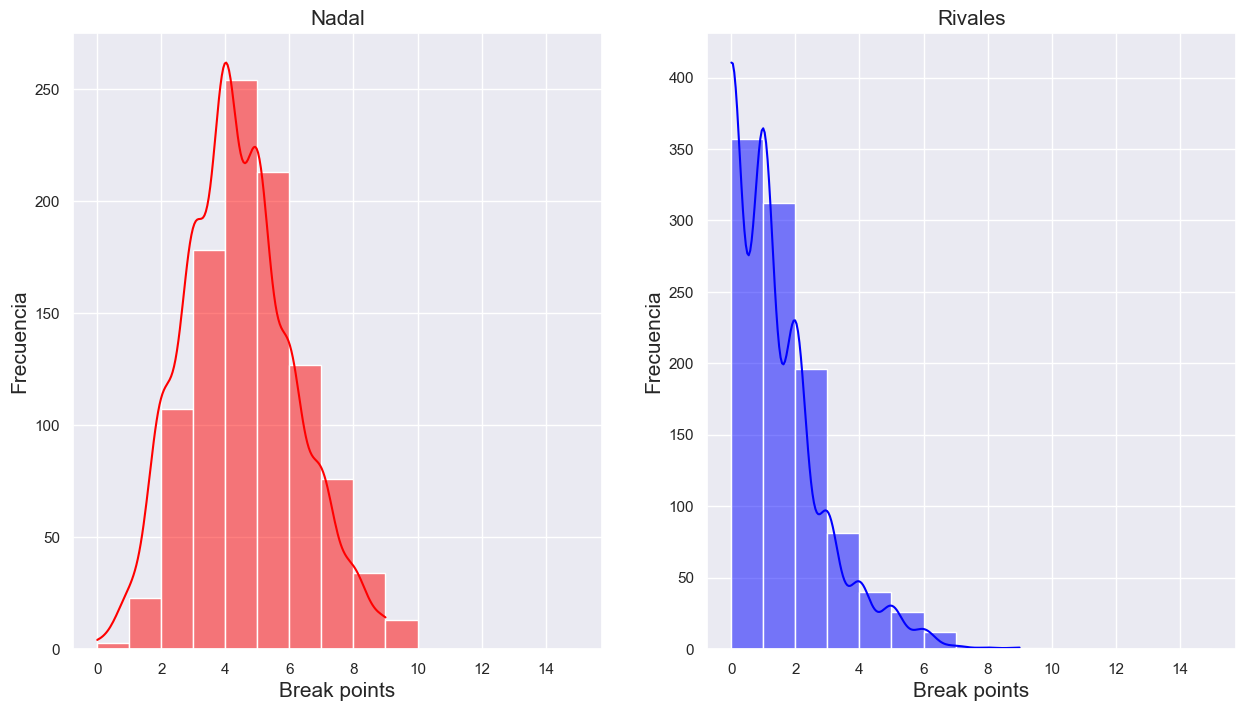

In [26]:
sns.set()
fig, axes = plt.subplots(1, 2, sharex=True,figsize=(15, 8))
sns.histplot(data=df_nadal_1, x="break_points_made", bins=15, kde=True, binrange=[0,15], color='red',ax=axes[0])
sns.histplot(data=df_nadal_1, x="break_points_recieved", bins=15, kde=True, binrange=[0,15], color='blue',ax=axes[1])
axes[0].set_title('Nadal', fontdict={'size': 15})
axes[1].set_title('Rivales', fontdict={'size': 15})
axes[0].set_xlabel('Break points', fontdict={'size': 15})
axes[1].set_xlabel('Break points', fontdict={'size': 15})
axes[0].set_ylabel('Frecuencia', fontdict={'size': 15})
axes[1].set_ylabel('Frecuencia', fontdict={'size': 15})

### Insights:

#### - El describe nos da las medidas de los valores de w_ y l_.

#### - El porcentaje de los primeros saques es mas alto que sus rivales. Se concentra entre 60% y 80%, mientras que el de sus rivales varía mucho entre 40% y 75%. Posiblemente, sea el valor más determinante para saber sí es ganador o no. 

#### - El porcentaje de victorias sobre las superficies, indica en que superficie tiene más chances de ganar un partido. En este caso, Nadal tiene un gran porcentaje de victorias en Clay/Polvo de ladrillo.

#### - Los aces depende mucho del jugador y de su estilo. En algunos casos, es irrelevante. En este caso, hay una ligera diferencia en los puntos marcados por el histograma que no tiene mucho peso en el resultado.

#### - Los break points son cruciales ya que dan vuelta el resultado. Es importante anotar tantos como es posible. En este caso, hace varios por partidos. Son suficientes como para garantizarse un set.